In [1]:
from math import cos, pi, sin

from direct.showbase.ShowBase import ShowBase
from py_src.util.app import ContextShowBase
from direct.task import Task
from panda3d.core import (
    Geom,
    GeomNode,
    GeomTriangles,
    GeomVertexData,
    GeomVertexFormat,
    GeomVertexWriter,
    GeomEnums
)


In [2]:
import numpy as np
import torch
from py_src.geom.basic import create_cube_node, create_sphere_node,uv_curve_surface


In [3]:
import builtins


class MyApp(ContextShowBase):
    def __init__(self):
        super().__init__()

        # cube = create_cube()
        sphere = create_sphere_node("01",4, 4)
        self.render.attachNewNode(sphere)

        # Set the camera position
        # https://docs.panda3d.org/1.10/python/introduction/tutorial/controlling-the-camera
        self.taskMgr.add(self.spin_camera_task, "SpinCameraTask")

    def spin_camera_task(self, task):
        angleDegrees = task.time * 60.0
        angleRadians = angleDegrees * (pi / 180.0)
        self.camera.setPos(20 * sin(angleRadians), -20 * cos(angleRadians), 3)
        self.camera.setHpr(angleDegrees, 0, 0)

        return Task.cont
    
# class AppWrapper:
#     def __init__(self, appClass):
#         self.appClass = appClass
#     def __enter__(self):
#         self.app = appClass()
    
#     def run(self, *args, **kwargs):
#         self.app.run(*args, **kwargs)
        
#     def __exit__(self, *args):
#         self.app.destroy()
import traceback
try:
    with MyApp() as app:
        app.run()
except Exception as e:
    
    print(e)
    print(traceback.format_exc())
finally:
    if hasattr(builtins, 'base'):
        builtins.base.destroy()

Known pipe types:
  glxGraphicsPipe
(all display modules loaded.)
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager


---<__main__.MyApp object at 0x7fa7619b0790> destroy at 2024-08-22 00:29:06.130705---
---<__main__.MyApp object at 0x7fa7619b0790> destroyed at 2024-08-22 00:29:06.131165, exit---


SystemExit: 

/media/ywatcher/ExtDisk1/LDisk/Packages/game_env/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [30]:
# https://stackoverflow.com/questions/75774821/how-to-create-three-dimensional-geometric-shapes-in-panda3d-in-python

#!/usr/bin/env python3



class MyApp(ShowBase):
    def __init__(self):
        super().__init__()

        cube = create_cube()
        self.render.attachNewNode(cube)

        # Set the camera position
        # https://docs.panda3d.org/1.10/python/introduction/tutorial/controlling-the-camera
        self.taskMgr.add(self.spin_camera_task, "SpinCameraTask")

    def spin_camera_task(self, task):
        angleDegrees = task.time * 60.0
        angleRadians = angleDegrees * (pi / 180.0)
        self.camera.setPos(20 * sin(angleRadians), -20 * cos(angleRadians), 3)
        self.camera.setHpr(angleDegrees, 0, 0)

        return Task.cont


app = MyApp()
app.run()

Known pipe types:
  glxGraphicsPipe
(all display modules loaded.)


Exception: Attempt to spawn multiple ShowBase instances!

In [28]:
def plane():
    u_size=6
    v_size=6
    u = torch.broadcast_to(torch.arange(6).view(-1,1), (6,6))
    v = torch.broadcast_to(torch.arange(6).view(1,-1), (6,6))
    # x = torch.zeros(6,6)
    # y = u
    # z = v
    uv = torch.concat([u.unsqueeze(-1),v.unsqueeze(-1)],dim=-1)
    return uv
uv = plane()

In [48]:
uv.shape

torch.Size([6, 6, 2])

In [38]:
import seaborn as sns
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

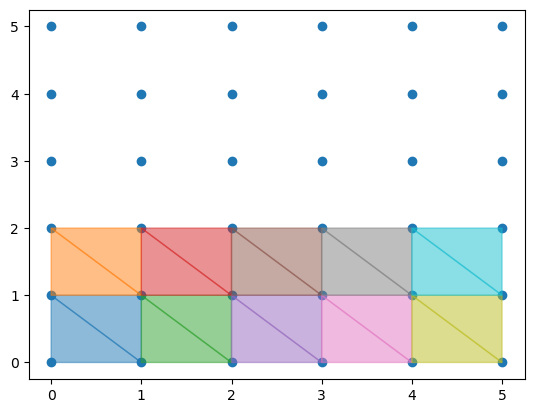

In [53]:
uv_unsq = uv.view(-1,2)
plt.scatter(uv_unsq[:,0], uv_unsq[:,1])
import matplotlib.pyplot as plt
cnt=0
p =sns.color_palette("tab10") 
# t1 = plt.Polygon(uv[:3,:], color=Y[0])
t = []
T = []
for row in range(5):
    for col in range(2):
        v1 = uv[row,col].unsqueeze(0)
        v2 = uv[row,col+1].unsqueeze(0)
        v3 = uv[row+1,col].unsqueeze(0)
        v4 = uv[row+1,col+1].unsqueeze(0)
        
        
        # print(v1.shape)
        v = torch.concat([v1,v2,v3,v4],dim=0)
        # V = 
        # print(v)
        t.append(plt.Polygon(
            # uv[,:], 
            v[:-1],
            # color=Y[0],
            color=p[cnt], alpha=0.5
        ))
        T.append(plt.Polygon(
            # uv[,:], 
            v[1:],
            # color=Y[0],
            color=p[cnt], alpha=0.5
        ))
        plt.gca().add_patch(t[-1])
        plt.gca().add_patch(T[-1])
        cnt+=1
        # print(cnt)
plt.show()

In [12]:
9 - (not False)

8

In [19]:
s = create_sphere_node("1", 12,12)
type(s)

panda3d.core.GeomNode

In [23]:
s.

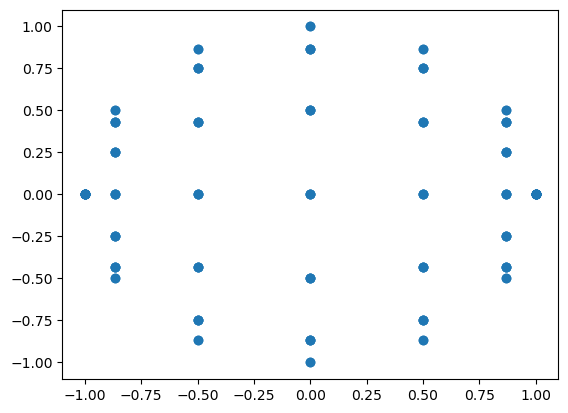

In [12]:
import matplotlib.pyplot as plt
plt.scatter(s[:,:,2],s[:,:,1])

In [8]:
a = torch.arange(0,1,step=1/6)

In [9]:
import torch

In [12]:
help(torch.concat)

Help on built-in function concat in module torch:

concat(...)
    concat(tensors, dim=0, *, out=None) -> Tensor
    
    Alias of :func:`torch.cat`.



In [11]:
help(torch.broadcast_to)

Help on built-in function broadcast_to in module torch:

broadcast_to(...)
    broadcast_to(input, shape) -> Tensor
    
    Broadcasts :attr:`input` to the shape :attr:`\shape`.
    Equivalent to calling ``input.expand(shape)``. See :meth:`~Tensor.expand` for details.
    
    Args:
        input (Tensor): the input tensor.
        shape (list, tuple, or :class:`torch.Size`): the new shape.
    
    Example::
    
        >>> x = torch.tensor([1, 2, 3])
        >>> torch.broadcast_to(x, (3, 3))
        tensor([[1, 2, 3],
                [1, 2, 3],
                [1, 2, 3]])



In [17]:
a

tensor([0.0000, 0.1667, 0.3333, 0.5000, 0.6667, 0.8333])

In [20]:
a.unsqueeze(-1)

tensor([[0.0000],
        [0.1667],
        [0.3333],
        [0.5000],
        [0.6667],
        [0.8333]])

In [ ]:
ShowBase.

In [2]:
class Cls:
    def __enter__(self):
        return self
    def __exit__(self,*args):
        print("exit")
with Cls() as s:
    print(s)

exit


In [9]:
import datetime
print("{}".format(datetime.datetime.now()))

2024-08-21 23:05:08.025825
